$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# <center> Activation Functions: An Examination of the Rectified Linear Function and its Performance </center>
<center> Vignesh M. Pagadala </center>
<center> Department of Computer Science </center>
<center> Colorado State University </center>
<center> Vignesh.Pagadala@colostate.edu </center>
***

## <center> Contents </center>
***
1. Abstract
2. Rectified Linear Unit
> - Description
> - Implementation
3. Performance in Comparision with tanH
> - Plot
> - Observations
> - Inference
4. References

## 1. Abstract
<p>
    Presently, one of the most popular activation functions in use for training neural networks is the Rectified Linear Unit, abbreviated as ReLU. In this report, we perform an experiment to examine the performance of a neural network with ReLU used as the activation function, and compare it with the performance when the hyperbolic tangent function is used in the same capacity. We initially define functions implementing ReLU, and apply it to train several different neural network configurations, and also do the same using the hyperbolic tangent function. We finally calculate the Root Mean Squared Error (RMSE), plot the results, observe and infer.  
</p>

### Module Imports

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neuralnetworksA2 as nn

## 2. Rectified Linear Unit <br>

 - ### Description <br> 
    The Rectified Linear function is described as follows. If the input is zero or positive, then the rectifier output is essentially the input itself. If negative, then the output is zero. Mathematically, <br> 
    <center> $f(x) = max(0,x)$ </center>
    <br>
    ![title](ReLU.jpg)
    <br> It is quite evident upon looking at the above plot that the slope of the graph for values lesser than or equal to 0, is 0, and for values greater than 0, 1. Therefore, the derivative of this function can be represented as, <br><br>
    <center> $ f(x) = 0, if x <= 0 $ </center>
    <center> $ f(x) = 1, if x > 0  $ </center>
    
 - ### Implementation <br>


In [35]:
# Create new class NeuralNetworkReLU which inherits from the NeuralNetwork class, and define new functions 
# activation and activationDerivate which implement the Rectified Linear function. 
class NeuralNetworkReLU(nn.NeuralNetwork):
    def __init__(self, ni, nh, no):
        super(NeuralNetworkReLU, self).__init__(ni, nh, no)

    def activation(self, weighted_sum):
        return np.maximum(0, weighted_sum)

    def activationDerivative(self, activation_value):
        actDer = np.copy(activation_value)
        actDer[actDer <= 0] = 0
        actDer[actDer > 0] = 1
        return actDer

## 3. Performance Comparision with tanH

 - ### Plot


Let us define the function *partition* as shown below. The primary purpose of this function is to take in input data, and the desired target output, and divide the records into training and testing data, based on the fraction argument.

In [36]:
def partition(X, T, fraction, shuffle):
    nRows = X.shape[0]
    # Choose number of rows for training and testing data.
    nTrain = int(round(fraction*nRows)) 
    nTest = nRows - nTrain

    rows = np.arange(nRows)
    # If the shuffle argument is set to true, then mix up the data records randomly.
    if(shuffle == True):
        np.random.shuffle(rows)

    trainIndices = rows[:nTrain]
    testIndices = rows[nTrain:]

    Xtrain = X[trainIndices, :]
    Ttrain = T[trainIndices, :]
    Xtest = X[testIndices, :]
    Ttest = T[testIndices, :]
    
    return Xtrain, Ttrain, Xtest, Ttest

The following function is to determine the Root Mean Squared Error for any two input arguments.

In [37]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

Let's try out a few examples to demonstrate the working of the partition function.

In [38]:
X = np.arange(10*2).reshape((10, 2))
T = X[:, 0:1] * 0.1

In [39]:
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [40]:
T

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ],
       [1.2],
       [1.4],
       [1.6],
       [1.8]])

In [41]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=False)

In [42]:
Xtrain

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15]])

In [43]:
Ttrain

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ],
       [1.2],
       [1.4]])

In [44]:
Xtest

array([[16, 17],
       [18, 19]])

In [45]:
Ttest

array([[1.6],
       [1.8]])

Examples for ```shuffle=True```. The data samples in this case are rearranged randomly before partitioning is done.

In [46]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=True)

In [47]:
Xtrain

array([[ 8,  9],
       [16, 17],
       [ 4,  5],
       [18, 19],
       [ 6,  7],
       [ 2,  3],
       [10, 11],
       [14, 15]])

In [48]:
Ttrain

array([[0.8],
       [1.6],
       [0.4],
       [1.8],
       [0.6],
       [0.2],
       [1. ],
       [1.4]])

In [49]:
Xtest

array([[12, 13],
       [ 0,  1]])

In [50]:
Ttest

array([[1.2],
       [0. ]])

Now, let's plot the RMSE values for the following cases.
1. Using tanh activation function, and calculating RMSE on training data.
2. Using tanh activation function, and calculating RMSE on testing data.
3. Using ReLU activation function and calculating RMSE on training data.
4. Using ReLU activation function and calculating RMSE on training data.

In the following snippet of code, we take each of the two activation functions, train using them with different hidden layer structures, 10 times for each structure, and store the RMSE mean in each case. Finally, we plot everything, with four different curves for each of the above cases.

Note: The following excerpt of code does not implement all the hidden-layer configuration tests, since I ran out of time to complete all tests. 


Completed hidden layer:  [1]

Completed hidden layer:  [1, 1]

Completed hidden layer:  [1, 1, 1]

Completed hidden layer:  [1, 1, 1, 1]

Completed hidden layer:  [1, 1, 1, 1, 1]

Completed hidden layer:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Completed hidden layer:  [2]

Completed hidden layer:  [2, 2]

Completed hidden layer:  [2, 2, 2]

Completed hidden layer:  [2, 2, 2, 2]

Completed hidden layer:  [2, 2, 2, 2, 2]

Completed hidden layer:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Completed hidden layer:  [5]

Completed hidden layer:  [5, 5]

Completed hidden layer:  [5, 5, 5]

Completed hidden layer:  [5, 5, 5, 5]

Completed hidden layer:  [5, 5, 5, 5, 5]

Completed hidden layer:  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

Completed hidden layer:  [1]

Completed hidden layer:  [1, 1]

Completed hidden layer:  [1, 1, 1]

Completed hidden layer:  [1, 1, 1, 1]

Completed hidden layer:  [1, 1, 1, 1, 1]

Completed hidden layer:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Completed hidden layer:  [2]

Completed hidden laye

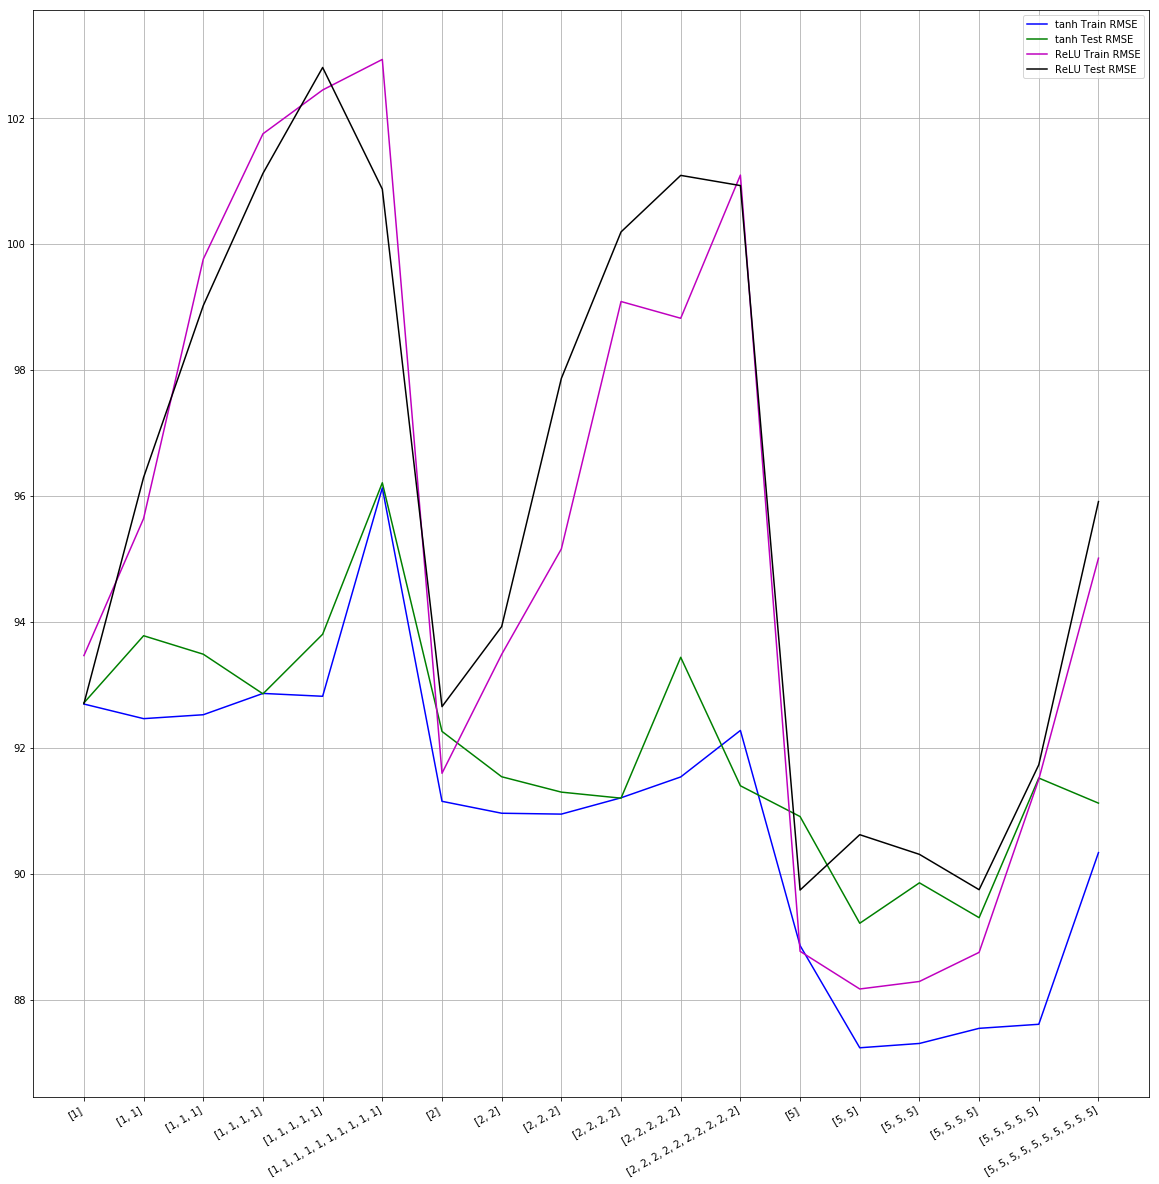

In [52]:
# Load the csv data.
dframe = pd.read_csv('energydata_complete.csv', sep=',',header=None)
# Filter out required columns.
#dframe = dframe.drop(dframe.columns[[0, -2, -1]], axis=1)

# Get target.
Td = dframe.iloc[1:, [1]]
Td = Td.as_matrix()
T = Td.astype(float)

# Get input.
Xd = dframe.iloc[1:, 2:-2]
Xd = Xd.as_matrix()
X = Xd.astype(float)

# Comparision
hiddenLayers = [[u]*nl for u in [1, 2, 5] for nl in [1, 2, 3, 4, 5, 10]]
tanHlist = []
ReLUlist = []
for actFun in [nn.NeuralNetwork, NeuralNetworkReLU]:
    for hidden in hiddenLayers:
        # Create list for storing RMSE.
        rmseTrainList = []
        rmseTestList = [] 
        for i in range(10):
            Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle = True)
            nnet = actFun(Xtrain.shape[1], hidden, Ttrain.shape[1])
            nnet.train(Xtrain, Ttrain, 100)
            rmseTrain = rmse(Ttrain, nnet.use(Xtrain))
            rmseTest = rmse(Ttest, nnet.use(Xtest))
            rmseTrainList.append(rmseTrain)
            rmseTestList.append(rmseTest)
        rmseTrainMean = np.mean(rmseTrainList)#sum(rmseTrainList)/len(rmseTrainList)
        rmseTestMean = np.mean(rmseTestList)#sum(rmseTestList)/len(rmseTestList)
        if(actFun == nn.NeuralNetwork):
            tanHlist.append([hidden, rmseTrainMean, rmseTestMean])
        else:
            ReLUlist.append([hidden, rmseTrainMean, rmseTestMean])
        print("\nCompleted hidden layer: ", hidden)

tanHlist = pd.DataFrame(tanHlist)
ReLUlist = pd.DataFrame(ReLUlist)

plt.figure(figsize = (20, 20))
plt.plot(tanHlist.values[:, 1], 'b', label = 'tanH Train RMSE')
plt.plot(tanHlist.values[:, 2], 'g', label = 'tanH Test RMSE')
plt.plot(ReLUlist.values[:, 1], 'm', label = 'ReLU Train RMSE')
plt.plot(ReLUlist.values[:, 2], 'k', label = 'ReLU Test RMSE')
#plt.plot(tanHlist.values[:, 1:], 'o-')
#plt.plot(ReLUlist.values[:, 1:], 'o-')
plt.legend(('tanh Train RMSE', 'tanh Test RMSE', 'ReLU Train RMSE', 'ReLU Test RMSE'))	
plt.xticks(range(tanHlist.shape[0]), hiddenLayers, rotation=30, horizontalalignment='right')
plt.grid(True)
plt.show()

 - ### Observations
 
The following can be observed in the above plot:

1. The RMSE values seem to fall in the range of 80 to 103.
2. tanH activation function appears to be doing much better than ReLU, in general. For the training data, the tanH train RMSE appears to be lower than ReLU train RMSE (except at [5], where it's the other way around). Also, for the test data, tanH test is, similarly, doing better than ReLU test. And again, it is only at hidden layer structure [5] where we can see better performance of ReLU over tanH. 
3. There appears to be an interesting 'oscillating' pattern for RMSE of both tanH and ReLU (which is more evident for ReLU), where, the error values shoot up for hidden layer structures with more number of layers. For ReLU, RMSE values shoot up to high values when the number of hidden layers are increased. The same happens in a more subtle way with tanH train and test errors.
4. Overall, for both ReLU and tanH, train and test RMSE, in general seem to decrease with increasing the number of neurons per hidden layer.
5. The largest RMSE for ReLU occurs at [1,1,1,1,1,1,1,1,1,1] for training data, and [1,1,1,1,1] for test data. The lowest RMSE for ReLU occurs at [5,5] for training data, and at [5] for test data.
6. The largest RMSE for tanH occurs at [1,1,1,1,1,1,1,1,1,1] for training data, and at the same hidden layer configuration for the test data. The least RMSE for tanH, occurs at [5,5] for training data, and at the same configuration for test data.
7. tanH activation function's test data achieves an overall lower RMSE compared with ReLU's test data.

 - ### Inference
 
1. Increasing the number of neurons in a hidden layers seems to increase the performance of the neural network.
2. Increasing the number of hidden layers does not appear to be a good idea, since configuraitons with a higher number of hidden layers seem to have higher RMSE.
3. The tanH activation function, in general, appears to be doing much better than ReLU, since the RMSE values are lower for tanH than ReLU for the majority of the hidden layer structures. 
4. From the above tests, the configurations which leads to the best performance appears to be [5,5], for both tanH and ReLU. ReLU's test performs best at [5], and tanH's best performs best at [5,5].

## 4. References
[1] George E. Dahl, Tara N. Sainath and Geoffrey
E. Hinton, “Improving Deep Neural Networks for LVCSR Using Rectified Linear Units" <br>
[2] Dr Charles Anderson, CS445 class notes, Spring 2018 <br>
[3] Prajit Ramachandran, Barret Zoph, Quoc V. Le, "Searching for Activation Functions" Link: https://arxiv.org/pdf/1710.05941.pdf